<a href="https://colab.research.google.com/github/MonirulIslamm08/Electric-Vehicle-Battery-Ambient-Temperature-Predictor/blob/main/Electric_Vehicle_Battery_Ambient_Temperature_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/metadata.csv')
df.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   start_time           7565 non-null   object
 2   ambient_temperature  7565 non-null   int64 
 3   battery_id           7565 non-null   object
 4   test_id              7565 non-null   int64 
 5   uid                  7565 non-null   int64 
 6   filename             7565 non-null   object
 7   Capacity             2794 non-null   object
 8   Re                   1956 non-null   object
 9   Rct                  1956 non-null   object
dtypes: int64(3), object(7)
memory usage: 591.1+ KB


In [4]:
df = df.drop(columns=['start_time','battery_id','test_id','uid','filename'])

In [5]:
df

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.6743047446975208,NaN,NaN
1,impedance,24,NaN,0.05605783343888099,0.20097016584458333
2,charge,4,NaN,NaN,NaN
3,impedance,24,NaN,0.05319185850921101,0.16473399914864734
4,discharge,4,1.5243662105099023,NaN,NaN
...,...,...,...,...,...
7560,impedance,24,NaN,0.0968087979207628,0.15489738203707232
7561,discharge,4,1.0201379996149256,NaN,NaN
7562,charge,4,NaN,NaN,NaN
7563,discharge,4,0.9907591663373165,NaN,NaN


# Handling missing values

In [6]:
# Convert 'Re', 'Rct', and 'Capacity' to numeric, invalid parsing will be set to NaN
df['Re'] = pd.to_numeric(df['Re'], errors='coerce')
df['Rct'] = pd.to_numeric(df['Rct'], errors='coerce')
df['Capacity'] = pd.to_numeric(df['Capacity'], errors='coerce')

In [7]:
df['Capacity'].fillna(df['Capacity'].median(), inplace=True)
df['Re'].fillna(df['Re'].median(), inplace=True)
df['Rct'].fillna(df['Rct'].median(), inplace=True)

# encoding

In [8]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [9]:
label_encoder = LabelEncoder()

df['type'] = label_encoder.fit_transform(df['type'])

Train test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Features (X) - All columns except 'ambient_temperature'
X = df.drop(columns=['ambient_temperature'])

# Target (y) - 'ambient_temperature' column
y = df['ambient_temperature']

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the split data
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (6052, 4)
X_test shape: (1513, 4)


# Scalling

In [12]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Check the scaled data
print(f'Scaled X_train: \n{X_train[:5]}')

Scaled X_train: 
      type  Capacity        Re       Rct
4552     2  1.428065  0.060860  0.078402
4450     1  1.203903  0.072553  0.101419
1656     1  0.095185  0.072553  0.101419
3570     0  1.428065  0.072553  0.101419
6618     1  1.414787  0.072553  0.101419


# Build  a deep learning model:

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [15]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(X_train_scaled, y_train, epochs=100
                  , batch_size=32, validation_data =(X_test_scaled,y_test))

Epoch 1/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 384.4573 - mae: 16.3821 - val_loss: 9689806859589910528.0000 - val_mae: 80027288.0000
Epoch 2/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 118.8937 - mae: 8.4581 - val_loss: 10131212399630352384.0000 - val_mae: 81829752.0000
Epoch 3/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 114.9056 - mae: 8.3148 - val_loss: 10491314552354897920.0000 - val_mae: 83271328.0000
Epoch 4/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 112.0720 - mae: 8.2665 - val_loss: 9718103890842353664.0000 - val_mae: 80144056.0000
Epoch 5/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 110.2795 - mae: 8.1936 - val_loss: 10414170617526878208.0000 - val_mae: 82964616.0000
Epoch 6/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 109.9023 - mae: 8.0868 - val_loss: 13354737500199845888.0000 - val_mae: 93950304.0000
Epoch 7/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 103.2383 - mae: 7.9662 - val_loss: 14630807605652488192.00

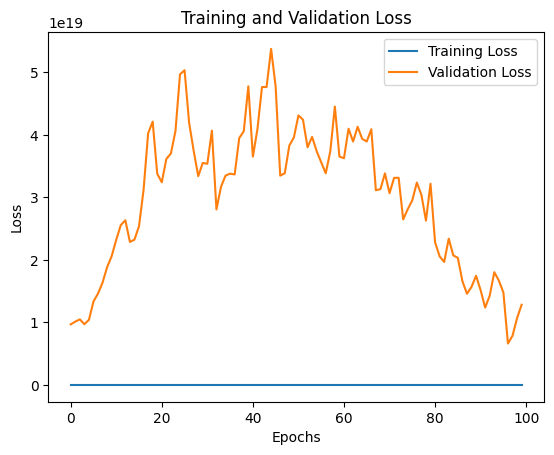

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

In [18]:
model.evaluate(X_test_scaled,y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43077933190403325952.0000 - mae: 309214944.0000


[1.2827729482378904e+19, 92077904.0]

# Prediction

In [19]:
df

,type,ambient_temperature,Capacity,Re,Rct
0,1,4,1.674305,0.072553,0.101419
1,2,24,1.428065,0.056058,0.200970
2,0,4,1.428065,0.072553,0.101419
3,2,24,1.428065,0.053192,0.164734
4,1,4,1.524366,0.072553,0.101419
...,...,...,...,...,...
7560,2,24,1.428065,0.096809,0.154897
7561,1,4,1.020138,0.072553,0.101419
7562,0,4,1.428065,0.072553,0.101419
7563,1,4,0.990759,0.072553,0.101419


In [20]:
import numpy as np

def predict_battery_life(type_discharge, Capacity, Re, Rct, label_encoder, scaler, model):

    # Encode the categorical feature
    type_discharge_encoded = label_encoder.transform([type_discharge])[0]

    # Prepare the input feature vector
    X_input = np.array([[type_discharge_encoded,Capacity, Re, Rct]])

    # Scale the input features using the same scaler
    X_input_scaled = scaler.transform(X_input)

    # Predict the battery life (ambient_temperature)
    predicted_battery_life = model.predict(X_input_scaled)

    return predicted_battery_life[0]

In [21]:

# Example usage of the function
type_discharge = 'discharge'  # Example input for type
Capacity = 1.674305           # Example numeric value
Re = -4.976500e+11            # Example numeric value
Rct = 1.055903e+12            # Example numeric value

# Call the prediction function
predicted_battery_life = predict_battery_life(type_discharge, Capacity, Re, Rct, label_encoder, scaler, model)

print(f"Predicted Battery Life: {predicted_battery_life}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted Battery Life: [71553120.]


# save file

In [22]:

import pickle

# Save the model, scaler, and label encoder to disk
with open('battery_life_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

In [23]:
model.save("battery_life_model.h5")

In [24]:
import tensorflow

print(tensorflow.__version__)

2.18.0
